# Submission Dicoding NLP

Nama : Muhammad Rizq Ramadhan



# Dataset Description

Dataset yang saya gunakan adalah "dair-ai/emotion" dari Hugging Face. Dataset tersebut dihasilkan dari Twitter messages berdasarkan 6 emosi yaitu anger, fear, joy, love, sadness, dan surprise.

Berikut link dari dataset yang saya gunakan:

https://huggingface.co/datasets/dair-ai/emotion

## Setting Up The Dataset

In [1]:
pip install datasets

In [2]:
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")

## Data Preparation

In [3]:
import pandas as pd

In [4]:
data = dataset['train'].to_pandas()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [6]:
data['label'].value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

In [7]:
data['text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 16000, dtype: object

In [8]:
category = pd.get_dummies(data['label'])
data = pd.concat([data, category], axis=1)

In [9]:
data.sample(5)

,text,label,0,1,2,3,4,5
4391,i suppose thats wonderful because it means tha...,1,0,1,0,0,0,0
9944,i never knew i could feel so valued valued bey...,1,0,1,0,0,0,0
10408,i used to feel sadness about this having fond ...,2,0,0,1,0,0,0
15835,i guess ive been feeling homesick for a while,0,1,0,0,0,0,0
5277,i began to feel accepted by gaia on her own terms,2,0,0,1,0,0,0


In [10]:
data = data.rename(columns={
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
})

In [11]:
data.sample(5)

,text,label,sadness,joy,love,anger,fear,surprise
3951,i almost feel greedy for believing that i want...,3,0,0,0,1,0,0
7375,i feel peaceful and happy about this decision ...,1,0,1,0,0,0,0
10774,i attribute this feeling of melancholy to the ...,0,1,0,0,0,0,0
1837,i make the trip i feel a strange combination o...,4,0,0,0,0,1,0
5322,i feel like it dirty src http i,0,1,0,0,0,0,0


## Tokenize, Stemming and Stopwords

In [12]:
pip install nltk

In [13]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

data['text'] = data['text'].apply(remove_stopwords)

In [15]:
data.sample(5)

,text,label,sadness,joy,love,anger,fear,surprise
12556,feeling idol anime pretty popular could anything,1,0,1,0,0,0,0
2263,know feel hearts aching sadness loss good kind...,0,1,0,0,0,0,0
8619,feel ecstatic happy anxious,1,0,1,0,0,0,0
7247,ive experimenting lemony cakes several tests f...,1,0,1,0,0,0,0
7953,feel need blog pagetitle flab fab,1,0,1,0,0,0,0


In [16]:
text = data['text'].values
label = data[['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']].values

## Splitting The Folders

In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [18]:
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

In [19]:
shape_test = [text_train, text_test, label_train, label_test]

for shaping in shape_test:
  print(f"{shaping.shape}")

(12800,)
(3200,)
(12800, 6)
(3200, 6)


## Convert The Dataset into Numeric Value

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [69]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_train)

sequence_train = tokenizer.texts_to_sequences(text_train)
sequence_test = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(sequence_train,
                             padding='post',
                             maxlen=25,
                             truncating='post')

padded_test = pad_sequences(sequence_test,
                            padding='post',
                            maxlen=25,
                            truncating='post')

## Building The Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout,Dense

In [81]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=16),
    Dense(128, activation='relu'),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(6, activation='softmax')])

## Compiling The Model

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
Early_Stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    restore_best_weights='True',
    min_delta=0.1)

In [83]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training The Model

In [84]:
history = model.fit(
    padded_train, label_train,
    epochs=30,
    validation_data=(padded_test, label_test),
    verbose=2,
    callbacks=[Early_Stopping])

Epoch 1/30
400/400 - 12s - loss: 1.4778 - accuracy: 0.3392 - val_loss: 1.1167 - val_accuracy: 0.4459 - 12s/epoch - 30ms/step
Epoch 2/30
400/400 - 7s - loss: 1.0345 - accuracy: 0.4691 - val_loss: 1.0056 - val_accuracy: 0.4603 - 7s/epoch - 19ms/step
Epoch 3/30
400/400 - 9s - loss: 0.9016 - accuracy: 0.5543 - val_loss: 0.8737 - val_accuracy: 0.5859 - 9s/epoch - 22ms/step
Epoch 4/30
400/400 - 7s - loss: 0.7653 - accuracy: 0.6130 - val_loss: 0.8347 - val_accuracy: 0.6028 - 7s/epoch - 17ms/step
Epoch 5/30
400/400 - 9s - loss: 0.6856 - accuracy: 0.6329 - val_loss: 0.7979 - val_accuracy: 0.5922 - 9s/epoch - 21ms/step
Epoch 6/30
400/400 - 7s - loss: 0.6483 - accuracy: 0.6415 - val_loss: 0.7432 - val_accuracy: 0.6203 - 7s/epoch - 18ms/step
Epoch 7/30
400/400 - 9s - loss: 0.6102 - accuracy: 0.6569 - val_loss: 0.7374 - val_accuracy: 0.6428 - 9s/epoch - 21ms/step
Epoch 8/30
400/400 - 8s - loss: 0.5284 - accuracy: 0.7720 - val_loss: 0.5690 - val_accuracy: 0.8537 - 8s/epoch - 21ms/step
Epoch 9/30
400

## Visualization The Accuracy

In [27]:
import matplotlib.pyplot as plt

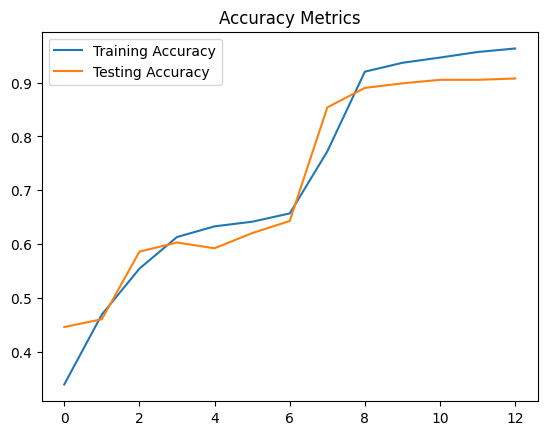

In [85]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Accuracy Metrics')
plt.legend()
plt.show()

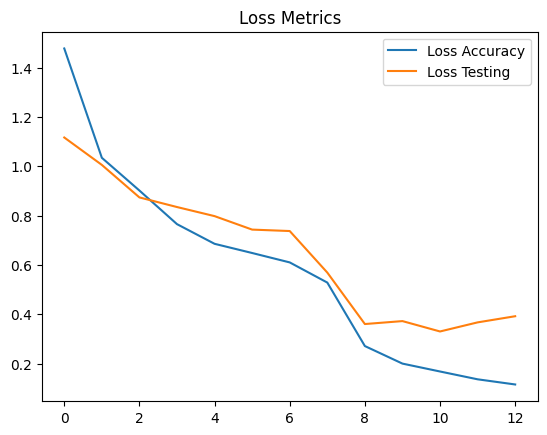

In [86]:
plt.plot(history.history['loss'], label='Loss Accuracy')
plt.plot(history.history['val_loss'], label='Loss Testing')
plt.title('Loss Metrics')
plt.legend()
plt.show()